# Ollama Embeddings With Langchain

- Author: [Gwangwon Jung](https://github.com/pupba)
- Design: []()
- Peer Review : [Teddy Lee](https://github.com/teddylee777), [ro__o_jun](https://github.com/ro-jun), [BokyungisaGod](https://github.com/BokyungisaGod), [Youngjun cho](https://github.com/choincnp)
- This is a part of [LangChain Open Tutorial](https://github.com/LangChain-OpenTutorial/LangChain-OpenTutorial)

[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/LangChain-OpenTutorial/LangChain-OpenTutorial/blob/main/08-Embeeding/05-OllamaEmbeddings.ipynb) [![Open in GitHub](https://img.shields.io/badge/Open%20in%20GitHub-181717?style=flat-square&logo=github&logoColor=white)](https://github.com/LangChain-OpenTutorial/LangChain-OpenTutorial/blob/main/08-Embeeding/05-OllamaEmbeddings.ipynb)

## Overview

This tutorial covers how to perform `Text Embedding` using `Ollama` and `Langchain`.

`Ollama` is an open-source project that allows you to easily serve models locally.

In this tutorial, we will create a simple example to measure the similarity between `Documents` and an input `Query` using `Ollama` and `Langchain`.

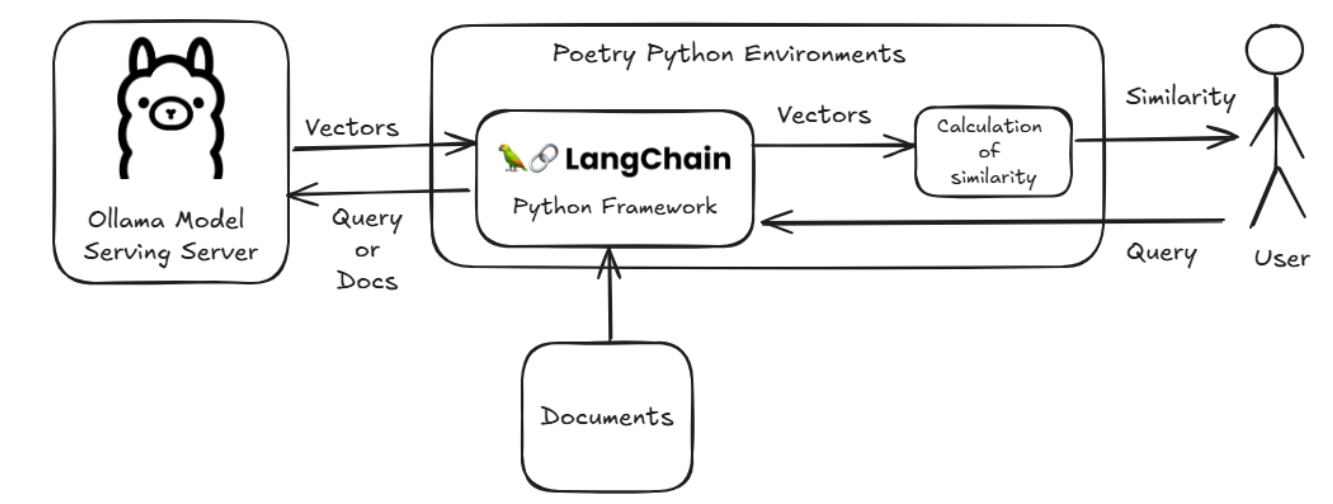

### Table of Contents

- [Overview](#overview)
- [Environement Setup](#environment-setup)
- [Ollama Install and Model Serving](#ollama-install-and-model-serving)
- [Identify Supported Embedding Models and Serving Model](#identify-supported-embedding-models-and-serving-model)
- [Model Load and Embedding](#model-load-and-embedding)
- [The similarity calculation results](#the-similarity-calculation-results)

### References

- [Ollama](https://ollama.com/)
- [Cosine Similarity](https://en.wikipedia.org/wiki/Cosine_similarity)
----

## Environment Setup

Set up the environment. You may refer to [Environment Setup](https://wikidocs.net/257836) for more details.

**[Note]**
- `langchain-opentutorial` is a package that provides a set of easy-to-use environment setup, useful functions and utilities for tutorials.
- You can checkout the [`langchain-opentutorial`](https://github.com/LangChain-OpenTutorial/langchain-opentutorial-pypi) for more details.

In [1]:
%%capture --no-stderr
%pip install langchain-opentutorial

In [2]:
# Install required packages
from langchain_opentutorial import package

package.install(
    [
        "langchain_community",
        "langchain-ollama",
        "scikit-learn",
    ],
    verbose=False,
    upgrade=False,
)

## Ollama Install and Model Serving

Ollama is an open-source project that makes it easy to run large language models(LLM) in a local environment. This tool allows users to download and run various LLMs with simple commands, enabling developers to experiment with and use AI models directly on their computers. Ollama is a tool with a user-friendly interface and fast performance, making AI development and experimentation more accessible and efficient.

- [Official Website/Installation](https://ollama.com/)

### Ollama User Guide

**Installing Ollama**

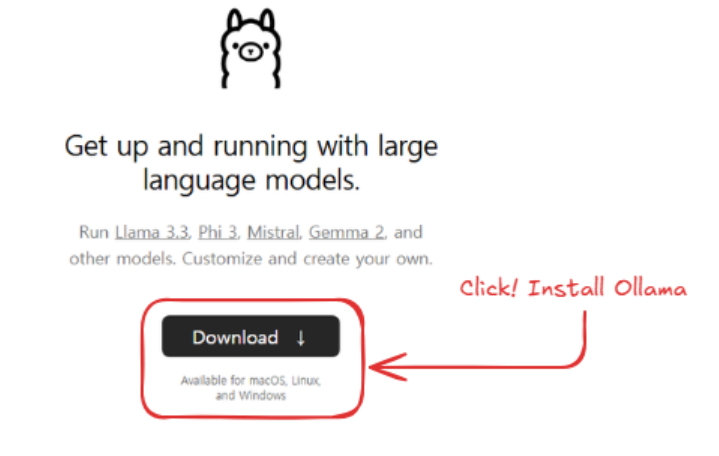

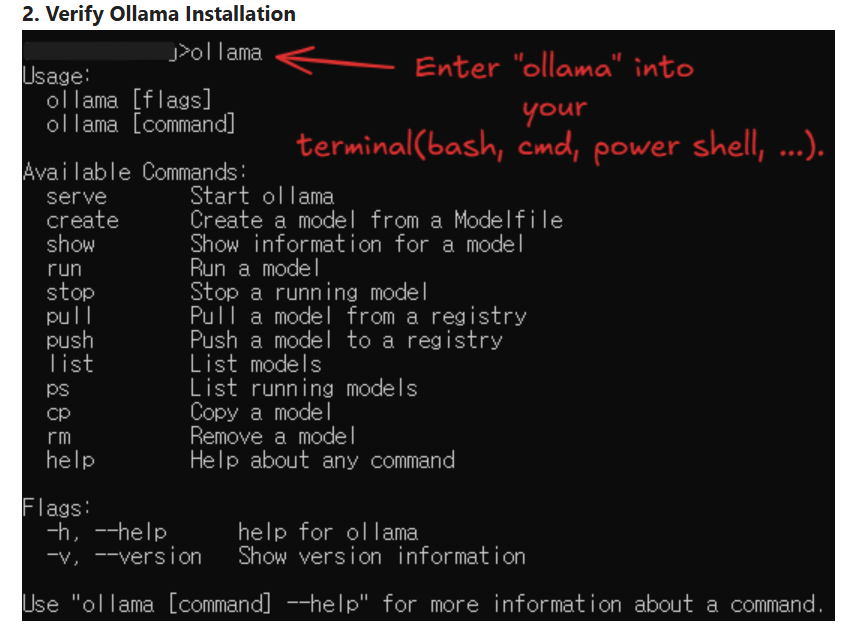

## Identify Supported Embedding Models and Serving Model

👇 You can find the model in the hyperlink below.

- [Ollama Models](https://ollama.com/search)

### Ollama Model Pull Guide

**1. Search Models**
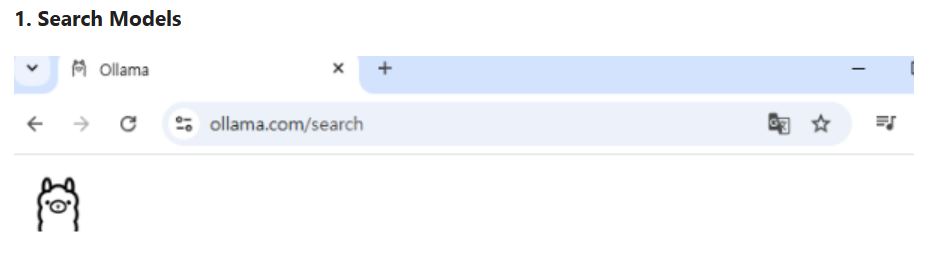

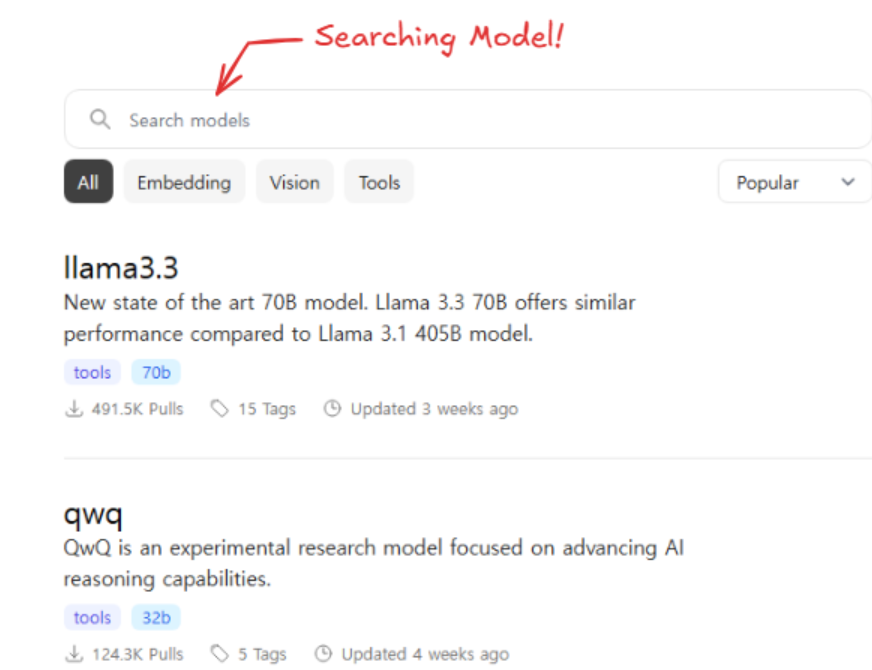

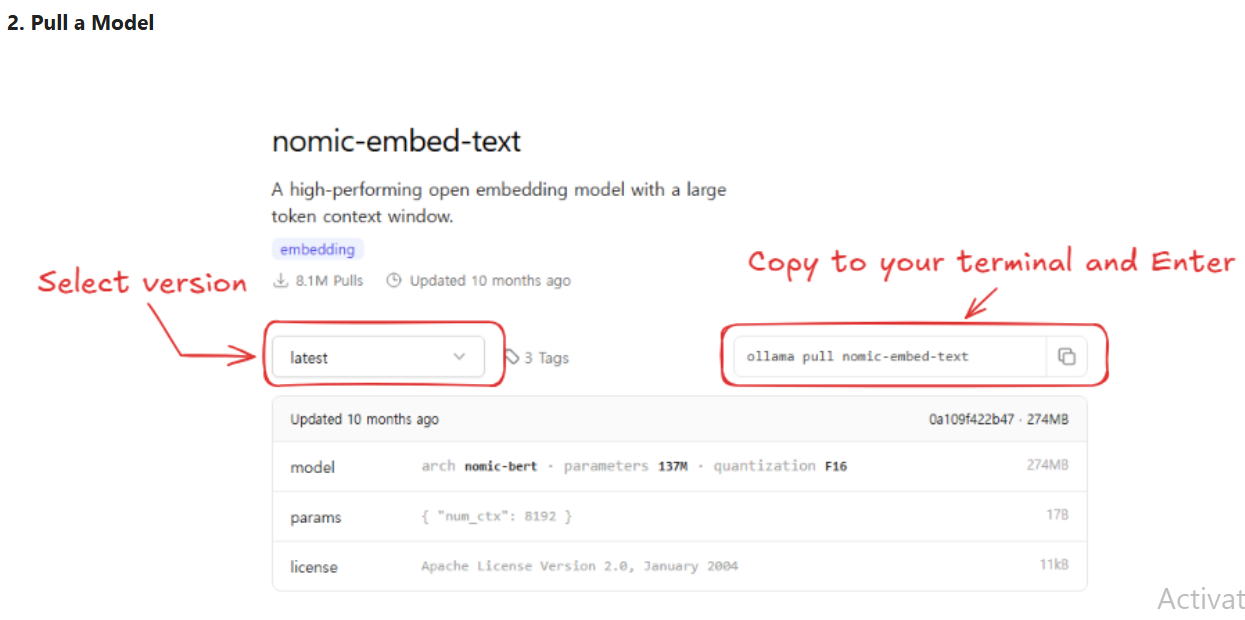

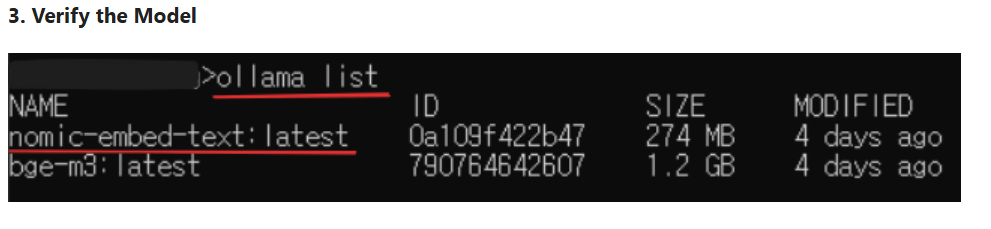

## Model Load and Embedding

Now that you have downloaded the model, let's load the model you downloaded and proceed with the embedding.

First, define `Query` and `Documents`

In [3]:
# Query
q = "Please tell me more about LangChain."

# Documents for Text Embedding
docs = [
    "Hi, nice to meet you.",
    "LangChain simplifies the process of building applications with large language models.",
    "The LangChain English tutorial is structured based on LangChain's official documentation, cookbook, and various practical examples to help users utilize LangChain more easily and effectively.",
    "LangChain simplifies the process of building applications with large-scale language models.",
    "Retrieval-Augmented Generation (RAG) is an effective technique for improving AI responses.",
]

Next, let's load the embedding model downloaded with `Ollama` using `Langchain`.


The `OllamaEmbeddings` class in `langchain_community/embeddings.py` will be removed in `langchain-community` version 1.0.0.

In [4]:
!pip install -U langchain-ollama

  Using cached langchain_core-0.3.49-py3-none-any.whl (420 kB)
  Using cached ollama-0.4.7-py3-none-any.whl (13 kB)
  Attempting uninstall: langchain-core
    Found existing installation: langchain-core 0.1.53
    Uninstalling langchain-core-0.1.53:
      Successfully uninstalled langchain-core-0.1.53


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
langchain 0.1.19 requires langchain-core<0.2.0,>=0.1.52, but you have langchain-core 0.3.49 which is incompatible.
langchain-text-splitters 0.0.2 requires langchain-core<0.3,>=0.1.28, but you have langchain-core 0.3.49 which is incompatible.
langchain-community 0.0.38 requires langchain-core<0.2.0,>=0.1.52, but you have langchain-core 0.3.49 which is incompatible.


In [6]:
# Load Embedding Model : Legacy
from langchain_community.embeddings import OllamaEmbeddings

# Serving and load the desired embedding model.
ollama_embeddings = OllamaEmbeddings(
    model="nomic-embed-text",  # model=<model-name>
)

So, in this tutorial, we used the `OllamaEmbeddings` class from `langchain-ollama`.

In [7]:
# Load Embedding Model : Latest
from langchain_ollama import OllamaEmbeddings

# Serving and load the desired embedding model.
ollama_embeddings = OllamaEmbeddings(
    model="nomic-embed-text",  # model=<model-name>
)

Let's use the loaded model to embed the `Query` and `Documents`.

In [8]:
# Embedding Query
embedded_query = ollama_embeddings.embed_query(q)

# Embedding Documents
embedded_docs = ollama_embeddings.embed_documents(docs)

print(f"Embedding Dimension Output: {len(embedded_query)}")

Embedding Dimension Output: 768


## The similarity calculation results

Let's use the vector values of the query and documents obtained earlier to calculate the similarity.

In this tutorial, we will use [cosine similarity](https://en.wikipedia.org/wiki/Cosine_similarity) to calculate the similarity between the `Query` and the `Documents`.

Using the `Sklearn` library in Python, you can easily calculate **cosine similarity**.

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculate Cosine Similarity
similarity = cosine_similarity([embedded_query], embedded_docs)

# Sorting by Similarity in descending order
sorted_idx = similarity.argsort()[0][::-1]

# Output Result
print("[Query] Tell me about LangChain.\n====================================")
for i, idx in enumerate(sorted_idx):
    print(f"[{i}] similarity: {similarity[0][idx]:.3f} | {docs[idx]}")
    print()

[Query] Tell me about LangChain.
[0] similarity: 0.775 | The LangChain English tutorial is structured based on LangChain's official documentation, cookbook, and various practical examples to help users utilize LangChain more easily and effectively.

[1] similarity: 0.748 | LangChain simplifies the process of building applications with large language models.

[2] similarity: 0.745 | LangChain simplifies the process of building applications with large-scale language models.

[3] similarity: 0.399 | Retrieval-Augmented Generation (RAG) is an effective technique for improving AI responses.

[4] similarity: 0.398 | Hi, nice to meet you.

